In [ ]:
import json
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import time 

import matplotlib.pyplot as plt
import pylab
from pylab import rcParams
        
import networkx as nx
import numpy as np

#tweets_data_path = 'D:\\coding-challenge-master\\data-gen\\tweets.txt'

tweets_data_path = 'D:\\coding-challenge-master\\insight_testsuite\\tests\\test-2-tweets-all-distinct\\tweet_input\\tweets.txt'
print tweets_data_path

tweets_data1 = []
tweets_file = open(tweets_data_path,"r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
    except:
        continue
    if not all(x in tweet for x in ['text', 'lang', 'place']):
        continue
    if tweet['place'] and not 'country' in tweet['place']:
        continue
    if tweet['entities'] and not 'hashtags' in tweet['entities']:
        continue
    tweets_data1.append(tweet)

len(tweets_data1)

def Extract_hashtag(hashtag,tags=None):
    
    if tags is None: 
        tags = [] 
    if isinstance(hashtag,list): 
        
        if len(hashtag) > 0:             
            if isinstance(hashtag[0],dict): 
                Extract_hashtag(hashtag[0],tags) 
    if isinstance(hashtag,dict): 
        
        for key, value in hashtag.items(): 
            if key == 'hashtags':
                n_tags = len(hashtag[key]) 
                for i in xrange(n_tags): 
                    tags.append(hashtag[key][i]['text']) 
            else: 
                 Extract_hashtag(value,tags) 
    return tags 


if __name__ == '__main__': 

    tweet_frame = pd.DataFrame()
    tweet_frame['text'] = map(lambda data: data['text'], tweets_data1)
    tweet_frame['created_at']= map(lambda data: time.strftime('%Y-%m-%d %H:%M:%S',\
                                    time.strptime(data['created_at'],'%a %b %d %H:%M:%S +0000  %Y')), \
                           tweets_data1)
    tweet_frame['lang'] = map(lambda data: data['lang'], tweets_data1)
    tweet_frame['place'] = map(lambda data: data['place'], tweets_data1)
    tweet_frame['A'] = [Extract_hashtag(tweet) for tweet in tweets_data1] 
    
    
tweet_frame

import networkx as nx
G = nx.DiGraph()


dfList = tweet_frame['A'].tolist()
print dfList
df = pd.Series(dfList)
print df


induvidual_hashtag = []
for line in dfList :
    for i in line :
        word = i.strip().split(',')
        countlist = set(word)
        induvidual_hashtag.extend(countlist)
    
induvidual_hashtag    

for_dict = dict(df)
#for_dict
dave = []
for key , value in for_dict.iteritems():
    dave.append( value)
for_dict

G.add_edges_from([(for_dict)])
print G.edge
val_map = for_dict
print 'val_map' , val_map
values = [val_map.get(node, 1.0) for node in G.nodes()]
print 'val',values
edge_labels=dict([(u,v) for u,v,d in G.edges(data=True)])


nx.draw_networkx_edges(G,pos,width=2.0,alpha=0.65)
#nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)

nx.draw(G,pos, node_color = values, node_size=1500, edge_cmap=plt.cm.Reds)

pylab.show()

%matplotlib inline
nx.draw(G)

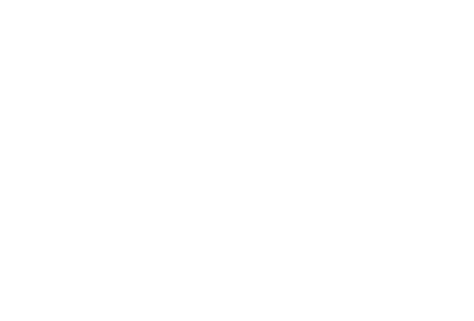